# Trabajo Práctico 1 NLP: Parte2.

## Ejercicio 2:

Apoyándose en la sección de información. Separa en fragmentos un texto extenso extraído
y vectoriza cada fragmento con alguno de los modelos de embedding vistos en clases.

Luego realiza un análisis de similitud de texto ingresando varias frases a buscar
semánticamente, compare distintas técnicas de distancias vistas en clases, elija la mejor y
justifique la razón por la que esa técnica se ajusta para este tipo de búsquedas.

OPCIONAL: Visualizar en 3D aplicando PCA o t-SNE la ubicación de los fragmentos y la
query ingresada vectorizada en el espacio. Realizar una observación sobre la visualización.

In [ ]:
# Lectura del archivo txt review_externa.txt.
with open('review_externa.txt', 'r') as archivo:
    texto_review = archivo.read()

In [ ]:
texto_review

'Título:Reseña: Tiny TownsEres el alcalde de una pequeña ciudad en el bosque, donde pacificas criaturas han creado una civilización escondida de los depredadores. En esta diminuta tierra los recursos son escasos, así que tomas lo que puedes y nunca dices no a los materiales de construcción. Planea con inteligencia para construir una ciudad prosperar y no permitas que se llene de recursos inútiles. ¡Quien construye la ciudad más prospera será el ganador!\nAsí se nos presenta Tiny Towns, un diseño de Peter McPherson, siendo este su primer título publicado. El juego fue publicado en 2019 por Alderac Entertainment Group en una versión en inglés. De las ilustraciones se encarga Matt Paquette (Mystic Vale, Custom Heroes, Ecos: First Continent).\nEn nuestro país se encuentra publicado en español por Arrakis Games (existe dependencia del idioma en las cartas, además del reglamento). Permite partidas de 1 a 6 jugadores, con una edad mínima sugerida de 14 años y una duración aproximada de entre 

In [ ]:
# Instalar librería y modelo en español.
!pip install -q spacy
!python -m spacy download es_core_news_sm

In [ ]:
# Fragmentar el texto con spacy.
import spacy

# Modelo en español.
nlp = spacy.load("es_core_news_sm")

doc_review = nlp(texto_review)

oraciones = [sent.text for sent in doc_review.sents]

In [ ]:
print(oraciones)

['Título:Reseña: Tiny TownsEres el alcalde de una pequeña ciudad en el bosque, donde pacificas criaturas han creado una civilización escondida de los depredadores.', 'En esta diminuta tierra', 'los recursos son escasos, así que tomas lo que puedes y nunca dices no a los materiales de construcción.', 'Planea con inteligencia para construir una ciudad prosperar y no permitas que se llene de recursos inútiles.', '¡Quien construye la ciudad más prospera será el ganador!\nAsí se nos presenta Tiny Towns, un diseño de Peter McPherson, siendo este su primer título publicado.', 'El juego fue publicado en 2019 por Alderac Entertainment Group en una versión en inglés.', 'De las ilustraciones se encarga Matt Paquette (Mystic Vale, Custom Heroes, Ecos: First Continent).\n', 'En nuestro país se encuentra publicado en español por Arrakis Games (existe dependencia del idioma en las cartas, además del reglamento).', 'Permite partidas de 1 a 6 jugadores, con una edad mínima sugerida de 14 años y una dur

In [ ]:
from sentence_transformers import SentenceTransformer

# Cargar modelo de embeddings preentrenado.
modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# Codificar las oraciones con el modelo.
embeddings_texto = modelo.encode(oraciones)

In [ ]:
# Frases a buscar semánticamente.
frases = ['De que trata Tiny Towns', 'Que contexto o mundo hay en el juego',
          'Mecánicas principales del juego', 'Reglas de Tiny Towns',
          'Turnos en el juego', 'Contenido que hay en la caja',
          'Cantidad de jugadores', 'Vale la pena jugar al juego']

embeddings_frases = modelo.encode(frases)

In [ ]:
# Distancia de coseno.
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similaridad_coseno = cosine_similarity(embeddings_frases, embeddings_texto)

for i, consulta in enumerate(frases):
    idx_max = np.argmax(similaridad_coseno[i])
    mejor_fragmento = oraciones[idx_max]
    score = similaridad_coseno[i, idx_max]

    print(f"Consulta: {consulta}")
    print(f"Fragmento más similar (coseno = {score:.4f}):")
    print(f"{mejor_fragmento}\n")

# La similaridad de coseno es la mejor para usar en este caso ya que utilizamos un modelo de empeddings que
# capturan el significado del texto, es decir, que aunque las palbras no coincidad del todo detectará
# significados similares.
# Jaccard y Dice solo funcionan bien cuando hay muchas palabras en común.

Consulta: De que trata Tiny Towns
Fragmento más similar (coseno = 0.5976):
¿Será ese el caso de Tiny Towns?

Consulta: Que contexto o mundo hay en el juego
Fragmento más similar (coseno = 0.2933):
Por eso es relativamente habitual ver como desfilan juegos que se parecen mucho entre sí, variando algún detallito para diferenciarse lo suficiente, aunque lo habitual es que se acabe retornando a esos juegos que ya han conseguido posicionarse en nuestra ludoteca.

Consulta: Mecánicas principales del juego
Fragmento más similar (coseno = 0.4502):
Los apartados Contenido y Mecánica están destinados especialmente a aquellos que no conocen el juego y prefieren hacerse una idea general de cómo funciona.


Consulta: Reglas de Tiny Towns
Fragmento más similar (coseno = 0.5501):
¿Será ese el caso de Tiny Towns?

Consulta: Turnos en el juego
Fragmento más similar (coseno = 0.3116):
Por eso es relativamente habitual ver como desfilan juegos que se parecen mucho entre sí, variando algún detallito para 

In [ ]:
# Distancia de Jaccard.
def jaccard_similarity(set_a, set_b):
    intersection = set_a.intersection(set_b)
    union = set_a.union(set_b)
    return len(intersection) / len(union)

for i, consulta in enumerate(frases):
    set_frase = set(consulta.lower().split())
    similaridades_jaccard = []
    for j, texto in enumerate(oraciones):
        set_texto = set(texto.lower().split())
        similaridad_jaccard = jaccard_similarity(set_frase, set_texto)
        similaridades_jaccard.append(similaridad_jaccard)

    idx_max = np.argmax(similaridades_jaccard)
    mejor_fragmento = oraciones[idx_max]
    score = similaridades_jaccard[idx_max]

    print(f"Consulta: {consulta}")
    print(f"Fragmento más similar (Jaccard = {score:.4f}):")
    print(f"{mejor_fragmento}\n")

Consulta: De que trata Tiny Towns
Fragmento más similar (Jaccard = 0.2000):
¿Será ese el caso de Tiny Towns?

Consulta: Que contexto o mundo hay en el juego
Fragmento más similar (Jaccard = 0.1667):
El juego fue publicado en 2019 por Alderac Entertainment Group en una versión en inglés.

Consulta: Mecánicas principales del juego
Fragmento más similar (Jaccard = 0.1000):
Detalle Cartas
La mecánica básica del juego será una construcción de patrones sobre una cuadricula de cuatro filas y cuatro columnas.

Consulta: Reglas de Tiny Towns
Fragmento más similar (Jaccard = 0.2222):
¿Será ese el caso de Tiny Towns?

Consulta: Turnos en el juego
Fragmento más similar (Jaccard = 0.2143):
El juego fue publicado en 2019 por Alderac Entertainment Group en una versión en inglés.

Consulta: Contenido que hay en la caja
Fragmento más similar (Jaccard = 0.1579):
Cada jugador dispondrá de una cuadricula de cuatro filas y cuatro columnas en la que desarrollar su ciudad.

Consulta: Cantidad de jugadores
Fr

In [ ]:
# Distancia de Dice.
def dice_similarity(set_a, set_b):
    intersection = set_a.intersection(set_b)
    return 2 * len(intersection) / (len(set_a) + len(set_b))

for i, consulta in enumerate(frases):
    set_frase = set(consulta.lower().split())
    similaridades_dice = []
    for j, texto in enumerate(oraciones):
        set_texto = set(texto.lower().split())
        similaridad_dice = dice_similarity(set_frase, set_texto)
        similaridades_dice.append(similaridad_dice)

    idx_max = np.argmax(similaridades_dice)
    mejor_fragmento = oraciones[idx_max]
    score = similaridades_dice[idx_max]

    print(f"Consulta: {consulta}")
    print(f"Fragmento más similar (Jaccard = {score:.4f}):")
    print(f"{mejor_fragmento}\n")

Consulta: De que trata Tiny Towns
Fragmento más similar (Jaccard = 0.3333):
¿Será ese el caso de Tiny Towns?

Consulta: Que contexto o mundo hay en el juego
Fragmento más similar (Jaccard = 0.2857):
El juego fue publicado en 2019 por Alderac Entertainment Group en una versión en inglés.

Consulta: Mecánicas principales del juego
Fragmento más similar (Jaccard = 0.1818):
Detalle Cartas
La mecánica básica del juego será una construcción de patrones sobre una cuadricula de cuatro filas y cuatro columnas.

Consulta: Reglas de Tiny Towns
Fragmento más similar (Jaccard = 0.3636):
¿Será ese el caso de Tiny Towns?

Consulta: Turnos en el juego
Fragmento más similar (Jaccard = 0.3529):
El juego fue publicado en 2019 por Alderac Entertainment Group en una versión en inglés.

Consulta: Contenido que hay en la caja
Fragmento más similar (Jaccard = 0.2727):
Cada jugador dispondrá de una cuadricula de cuatro filas y cuatro columnas en la que desarrollar su ciudad.

Consulta: Cantidad de jugadores
Fr

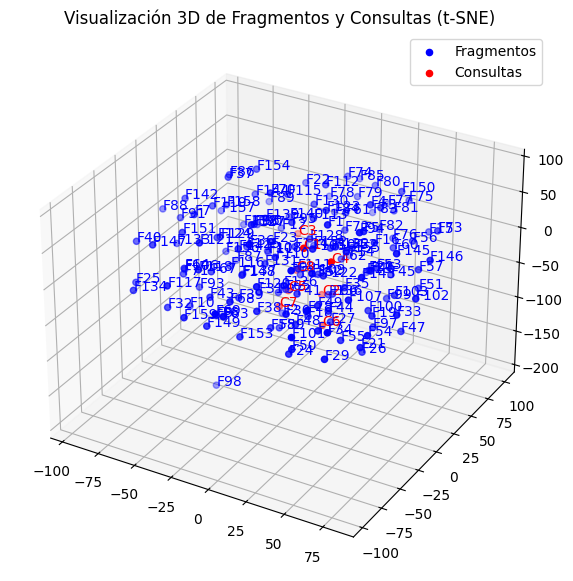

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fragmentos_completos = oraciones + frases
embeddings_completo = modelo.encode(fragmentos_completos)

tsne = TSNE(n_components=3, perplexity=50, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_completo)

n_fragmentos = len(oraciones)
fragmentos_3d = embeddings_tsne[:n_fragmentos]
consultas_3d = embeddings_tsne[n_fragmentos:]

# Visualización 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Fragmentos (azul)
ax.scatter(fragmentos_3d[:, 0], fragmentos_3d[:, 1], fragmentos_3d[:, 2], c='blue', label='Fragmentos')
for i, txt in enumerate(oraciones):
    ax.text(fragmentos_3d[i, 0], fragmentos_3d[i, 1], fragmentos_3d[i, 2], f"F{i+1}", color='blue')

# Consultas (rojo)
ax.scatter(consultas_3d[:, 0], consultas_3d[:, 1], consultas_3d[:, 2], c='red', label='Consultas')
for i, txt in enumerate(frases):
    ax.text(consultas_3d[i, 0], consultas_3d[i, 1], consultas_3d[i, 2], f"C{i+1}", color='red')

ax.set_title("Visualización 3D de Fragmentos y Consultas (t-SNE)")
ax.legend()
plt.show()

## Ejercicio 3

Apoyándose nuevamente en la sección de información. Recoge un texto extenso extraído,
divídelos en fragmentos, luego realiza extracciones de sustantivos (POS) y categoriza estos
sustantivos (NER), a continuación realiza una búsqueda de similitud filtrando por
sustantivos, compara las distintas técnicas de distancias vistas en clases, elija la mejor y
justifique la razón por la que esta técnica se ajusta para este tipo de búsquedas.

In [ ]:
# Cargar el texto del archivo manual.txt.
with open('manual.txt', 'r') as archivo:
    texto_manual = archivo.read()

In [ ]:
texto_manual

'A GAME BY PETER MCPHERSON, \nFOR 1-6 PLAYERS, AGES 14 AND UP. objective\nYour town is represented by a 4x4  grid, on which you will place Resource  cubes in specific layouts to construct  buildings. Each building scores Victory \nPoints (\n) in a unique way. When no  player can place any more resources or  construct any buildings, the game ends,  and any squares without a building are  worth -1\u2009\nThe player with the most \n wins! peter mcpherson\n§elcome!\nYou are the mayor of a tiny town  in the forest, where the smaller  creatures of the woods have created  a civilization hidden away from  predators. This new land is small  and the resources are scarce—you  take what you can get and never  say no to building materials. \nCleverly plan and construct a  thriving town, and don’t let it fill  up with wasted resources! \nWhoever builds the most  prosperous tiny town wins!  contents\n•\t 1 rulebook\n•\t 6 player boards\n•\t 25 Building cards\n•\t 15 Monument cards\n•\t 15 Resource ca

In [ ]:
import pandas as pd

# Modelo en español.
nlp = spacy.load("es_core_news_sm")

# Obtener los fragmentos del texto
doc_manual = nlp(texto_manual)

# Dividir los fragmentos en oraciones.
oraciones = [sent.text.strip() for sent in doc_manual.sents]

# Crear una lista para almacenar las palabras, etiquetas POS y explicaciones
sustantivos = []

# Iterar sobre las oraciones.
for sent in oraciones:
    sent_doc = nlp(sent)
    for token in sent_doc:
        # Obtener los sustantivos de cada oración.
        if token.pos_ in ['NOUN', 'PROPN']:
            ner = "O"
            # Obtener el tipo de sustantivo.
            for ent in sent_doc.ents:
                if token.text in ent.text:
                    ner = ent.label_
                    break
            # Agregar a la lista de sustantivos con su respectiva etiqueta y oración.
            sustantivos.append({
                "sustantivo": token.text,
                "oracion": sent,
                "NER": ner
            })


sustantivos_manual = pd.DataFrame(sustantivos).drop_duplicates(subset=["sustantivo"])

In [ ]:
sustantivos_manual

,sustantivo,oracion,NER
0,GAME,"A GAME BY PETER MCPHERSON, \nFOR 1-6 PLAYERS, ...",O
1,BY,"A GAME BY PETER MCPHERSON, \nFOR 1-6 PLAYERS, ...",O
2,PETER,"A GAME BY PETER MCPHERSON, \nFOR 1-6 PLAYERS, ...",O
3,MCPHERSON,"A GAME BY PETER MCPHERSON, \nFOR 1-6 PLAYERS, ...",O
4,FOR,"A GAME BY PETER MCPHERSON, \nFOR 1-6 PLAYERS, ...",O
...,...,...,...
2455,Jon,Thank you to the playtesters: \nCourtney Maki...,PER
2457,Ouch,Thank you to the playtesters: \nCourtney Maki...,PER
2458,”,Thank you to the playtesters: \nCourtney Maki...,O
2459,Luke,Thank you to the playtesters: \nCourtney Maki...,MISC


In [ ]:
# Cargar modelo de embeddings preentrenado.
modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# Agregar columna de embeddings a cada sustantivo.
sustantivos_manual["embedding"] = sustantivos_manual["sustantivo"].apply(lambda x: modelo.encode(x))

# Nueva consulta con su vector de embedding.
nueva_consulta = 'player'
embedding_nueva_consulta = modelo.encode(nueva_consulta)

# Calcular las similaridades de coseno para la nueva consulta.
cos_sim = cosine_similarity([embedding_nueva_consulta], np.stack(sustantivos_manual["embedding"]))[0]

# Funciones nuevas para Jaccard y Dice pero sólo para palabras.
def jaccard(s1, s2):
    set1, set2 = set(s1.lower()), set(s2.lower())
    return len(set1 & set2) / len(set1 | set2)

def dice(s1, s2):
    set1, set2 = set(s1.lower()), set(s2.lower())
    return 2 * len(set1 & set2) / (len(set1) + len(set2))

# Agregar las columnas con las distancias de cada sustantivo a la nueva consulta.
sustantivos_manual["coseno"] = cos_sim
sustantivos_manual["jaccard"] = sustantivos_manual["sustantivo"].apply(lambda x: jaccard(x, nueva_consulta))
sustantivos_manual["dice"] = sustantivos_manual["sustantivo"].apply(lambda x: dice(x, nueva_consulta))

# Obtener las filas con los sustantivos mas similares a cada consulta.
resultados = sustantivos_manual.sort_values(by="coseno", ascending=False)[["sustantivo", "oracion", "coseno", "jaccard", "dice", "NER"]]
resultados.head()

# Puede ser más conveniente utilizar la similitud de coseno porque es más capaz de detectar el significado semántico cuando las
# palabras son sinonimos pero no iguales o si se refieren a otro tipo de sustantivos.

,sustantivo,oracion,coseno,jaccard,dice,NER
32,player,When no player can place any more resources o...,1.000000,1.000000,1.000000,MISC
209,players,Draw 1 card from each pile and place them fac...,0.924853,0.857143,0.923077,O
290,Players,Players should select 1 Monument card to keep...,0.889809,0.857143,0.923077,MISC
336,play,"For your first game, you may want to play wit...",0.817804,0.666667,0.800000,O
2342,playester,Thank you to Indiana Nash for her endless enc...,0.812422,0.750000,0.857143,MISC


## Ejercicio 4:

Mediante detección de idioma, separar los archivos en distintos lenguajes y guardar esa
información en un dataframe.

In [ ]:
# Instalar la librería de langdetect para deteccion del lenguaje
!pip install langdetect

In [ ]:
# Cargar los archivos txt de los subtitulos de diferentes videos.
with open('video1.txt', 'r') as archivo:
    texto_video_1 = archivo.read()

with open('video2.txt', 'r') as archivo:
    texto_video_2 = archivo.read()

with open('video3.txt', 'r') as archivo:
    texto_video_3 = archivo.read()

with open('video4.txt', 'r') as archivo:
    texto_video_4 = archivo.read()

In [ ]:
from langdetect import detect

# Detectar idioma a los diferentes textos de videos.
for texto in [texto_video_1, texto_video_2, texto_video_3, texto_video_4]:
    idioma = detect(texto)
    print(f"El idioma del texto es: {idioma}")

El idioma del texto es: nl
El idioma del texto es: en
El idioma del texto es: en
El idioma del texto es: es


## Ejercicio 5:

En el caso de las reseñas realizadas por usuarios, utiliza análisis de sentimientos con
modelos pre entrenados y guarda la clasificación predecida de cada reseña.

Luego, crea un sistema de búsquedas por similitud semántica y que permita filtrar por
sentimiento para obtener.


In [ ]:
# Cargar los datos de reseñas de usuarios.
resenas_usuarios = pd.read_csv('reseñas_tiny_towns.csv')
resenas_usuarios.dropna(inplace=True) # Elimino columnas sin valoracion.

resenas_usuarios

,puntaje,reseña
0,9.0,"Beautiful, simple game of strategically arrang..."
1,5.5,This game feels like it will often end with re...
3,8.0,*\nThe only game I know of that plays equally ...
4,7.5,"If you like Tetras, you should like this. That..."
5,7.0,This one falls into that “Smurf-and-write sans...
...,...,...
494,8.0,"This is a fun, quick game where there is plent..."
495,8.0,We play it two-player most often; can get a li...
496,6.5,Theme: Town building\nGameplay: Drafting diffe...
498,4.0,I purchased this game to be a potential solo g...


In [ ]:
# Instalar librería para análisis de sentimientos.
!pip install SentimentAnalysis

In [ ]:
from AnalyseSentiment.AnalyseSentiment import AnalyseSentiment

# Cargar el modelo pre-entrenado para predecir valoración del juego.
sentiment = AnalyseSentiment()

# Agregar columna con el puntaje que da AnalyseSentiment (-1 a 1).
resenas_usuarios['puntaje'] = resenas_usuarios['reseña'].apply(sentiment.Analyse)
resenas_usuarios['puntaje'] = resenas_usuarios['puntaje'].apply(lambda x: x['overall_sentiment_score'])

# Agregar columna de tipo de sentimiento que asigna (Positive, Negative, Neutral).
resenas_usuarios['sentimiento'] = resenas_usuarios['reseña'].apply(sentiment.Analyse)
resenas_usuarios['sentimiento'] = resenas_usuarios['sentimiento'].apply(lambda x: x['overall_sentiment'])

In [ ]:
resenas_usuarios

,puntaje,reseña,sentimiento
0,0.8927,"Beautiful, simple game of strategically arrang...",Positive
1,0.5777,This game feels like it will often end with re...,Positive
3,0.9481,*\nThe only game I know of that plays equally ...,Positive
4,0.8225,"If you like Tetras, you should like this. That...",Positive
5,0.9839,This one falls into that “Smurf-and-write sans...,Positive
...,...,...,...
494,0.7736,"This is a fun, quick game where there is plent...",Positive
495,0.3400,We play it two-player most often; can get a li...,Positive
496,0.7131,Theme: Town building\nGameplay: Drafting diffe...,Positive
498,0.9356,I purchased this game to be a potential solo g...,Positive


In [ ]:
# Cargar modelo de embbedings pre-entrenado.
modelo = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Agregar columna con el vector que se le asigna a cada reseña.
resenas_usuarios["embedding"] = resenas_usuarios["reseña"].apply(lambda x: modelo.encode(x))

In [ ]:
# Función para buscar reseñas similares a la ingresada.
def buscar_resenas(query, sentimiento_filtro=None, top_n=5):
    # Vectorizar la consulta
    query_vector = modelo.encode(query)

    # Filtrar por sentimiento si se especifica
    df_filtrado = resenas_usuarios if sentimiento_filtro is None else resenas_usuarios[resenas_usuarios["sentimiento"] == sentimiento_filtro]

    if df_filtrado.empty:
        return "No hay reseñas con ese sentimiento."

    # Calcular similitud coseno
    embeddings = np.stack(df_filtrado["embedding"].values)
    similitudes = cosine_similarity([query_vector], embeddings)[0]

    # Agregar resultados a DataFrame
    df_filtrado = df_filtrado.copy()
    df_filtrado["similitud"] = similitudes

    # Ordenar y mostrar top_n
    resultados = df_filtrado.sort_values(by="similitud", ascending=False).head(top_n)
    return resultados[["reseña", "sentimiento", "puntaje", "similitud"]]

In [ ]:
buscar_resenas("very fun and easy to learn", sentimiento_filtro="Positive")

,reseña,sentimiento,puntaje,similitud
448,"Easy to learn, with an “easy” mode to start or...",Positive,0.7712,0.680523
82,"Super easy to learn/teach, but there are a lot...",Positive,0.5267,0.633730
45,A fun quick game that is easy to teach. My 8-y...,Positive,0.7351,0.621226
475,"Fun puzzle, relatively easy to teach. Needs mo...",Positive,0.8955,0.588204
299,"A game that is easy to set up, teach, and play...",Positive,0.8625,0.577430


## Ejercicio 6:

Crea un set de datos de consultas (más de 300 preguntas en total) y categorizalas entre la
fuente de datos que pueda llegar a responder esa pregunta entre estadísticas,
información y relaciones.

Por ejemplo:
- ¿Cómo gano en el ajedrez? -> Información
- ¿Quién trabajó para el ta-te-ti? -> Relaciones
- ¿Qué puntaje tienen las damas? -> Estadística

A continuación, transforma esas consultas en vectores y entrena un modelo de clasificación
(a gusto del estudiante) en donde pueda predecir la categoría a través de la consulta
ingresada.

Agregar métricas y análisis durante todo el desarrollo, trabaje en varios modelos y
comparelos.

In [ ]:
# Cargar las consultas sobre el juego con sus etiquetas.
consultas = pd.read_excel('consultas_tiny_towns.xlsx')

In [ ]:
consultas

,Consultas,Etiqueta
0,¿Cuántas veces puedes ganar con el mismo monum...,Informacion
1,¿Se puede usar el tablero individual?,Informacion
2,¿Tiny Towns es bueno para niños?,Estadisticas
3,¿Cuántas veces puedes jugar sin repetir cartas?,Informacion
4,¿Qué tan importante es la colocación de edific...,Informacion
...,...,...
299,¿Cómo es la anatomia de una carta?,Informacion
300,¿Cuáles son las reglas de construccion en Tiny...,Informacion
301,¿Cuándo se esta listo para hacer una construcc...,Informacion
302,¿Hay cartas que son mejores que otras?,Informacion


In [ ]:
# Cargar librerias de scikit-learn para utilizar modelo de clasificacion.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Cargar modelo de embbedings.
modelo = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

dataset = []

# Cargar los datos de las consultas con las etiquetas codificadas.
for index, row in consultas.iterrows():
    if row['Etiqueta'] == 'Informacion':
        dataset.append((0, row['Consultas']))
    elif row['Etiqueta'] == 'Estadisticas':
        dataset.append((1, row['Consultas']))
    elif row['Etiqueta'] == 'Relaciones':
        dataset.append((2, row['Consultas']))

# Separar las consultas de las etiquetas.
X = [texto.lower() for etiqueta, texto in dataset]
y = [etiqueta for etiqueta, texto in dataset]

# Dividir el conjunto de todos los datos en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizar con el modelo de embbedings las consultas.
X_train_vectorized = modelo.encode(X_train)
X_test_vectorized = modelo.encode(X_test)

# Modelo de Regresión Logística (balncear debido a que poseen mas consultas de una clase que de otras).
modelo_LR = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', class_weight='balanced')
modelo_LR.fit(X_train_vectorized, y_train)

# Predicción del modelo y calculo de métricas.
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

# Mostrar las diferentes métricas obtenidas.
print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

# Se puede observar en los resultados que aplicando un modelos de embeddings para vectorizar las consultas,
# Se obtienen valores de recall similares para las tres etiquetas. Lo que sería mejor para poder
# predecir consultas de cualquiera de las 3.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Descargar los stopwords que necesitaremos luego.
nltk.download('stopwords')

# Obtener las stopwords para español.
stopwords_espanol = stopwords.words('spanish')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizar las consultas con eliminación de stopwords con TfidfVectorizer.
vectorizer = TfidfVectorizer(stop_words=stopwords_espanol)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Modelo de Regresión Logística (balncear debido a que poseen mas consultas de una clase que de otras).
modelo_LR = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', class_weight='balanced')
modelo_LR.fit(X_train_vectorized, y_train)

# Predicción del modelo y calculo de métricas.
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

# Mostrar las diferentes métricas obtenidas.
print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

Precisión Regresión Logística: 0.8360655737704918
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.68      1.00      0.81        13
           2       0.75      0.38      0.50         8

    accuracy                           0.84        61
   macro avg       0.79      0.75      0.74        61
weighted avg       0.85      0.84      0.83        61



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
